# 1. Import Necessary libraries

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [2]:
cars_data = pd.read_csv('Cars.csv')
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


# 3. Data Understanding

## 3.1 Perform Initial Analysis

In [4]:
cars_data.shape

(81, 5)

In [5]:
cars_data.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [6]:
cars_data.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [7]:
cars_data.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


## 3.2 ASSUMPTIONS CHECK

## 1. Linearity Test

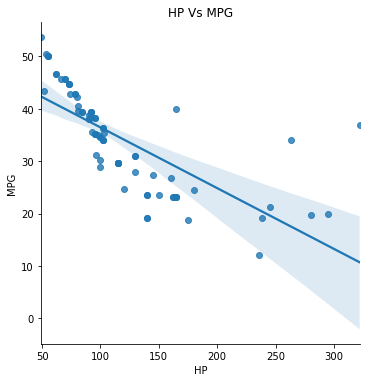

In [11]:
sns.lmplot(x='HP',y='MPG',data=cars_data)
plt.title('HP Vs MPG')
plt.show()

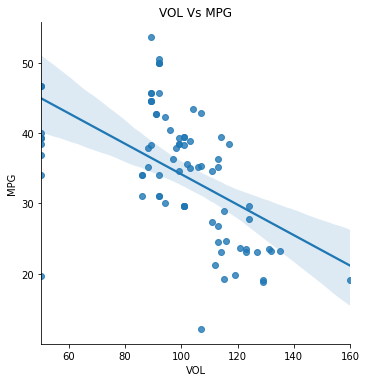

In [12]:
sns.lmplot(x='VOL',y='MPG',data=cars_data)
plt.title('VOL Vs MPG')
plt.show()

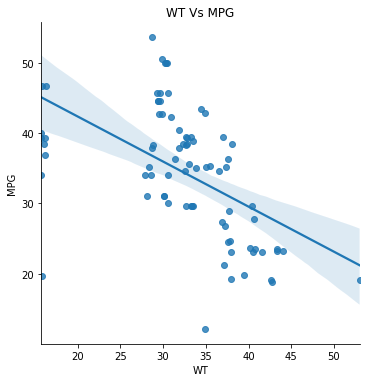

In [13]:
sns.lmplot(x='WT',y='MPG',data=cars_data)
plt.title('WT Vs MPG')
plt.show()

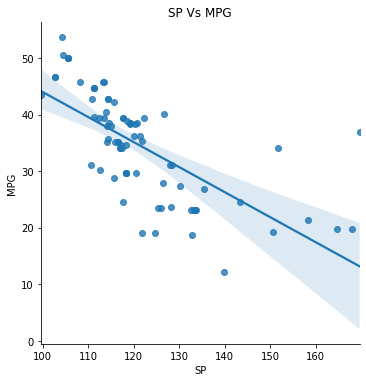

In [14]:
sns.lmplot(x='SP',y='MPG',data=cars_data)
plt.title('SP Vs MPG')
plt.show()

### Linearity Test is Failed.

## 3.2 Normality Test

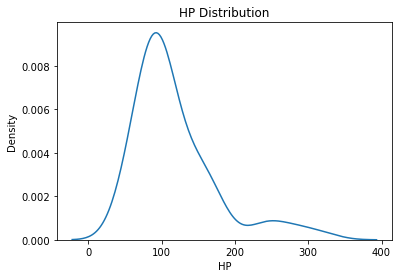

In [17]:
sns.kdeplot(data=cars_data,x='HP')
plt.title('HP Distribution')
plt.show()

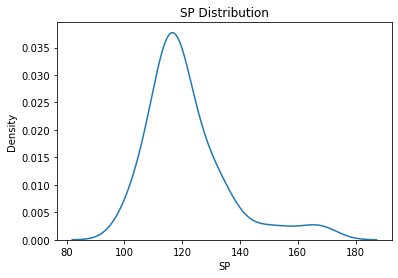

In [18]:
sns.kdeplot(data=cars_data,x='SP')
plt.title('SP Distribution')
plt.show()

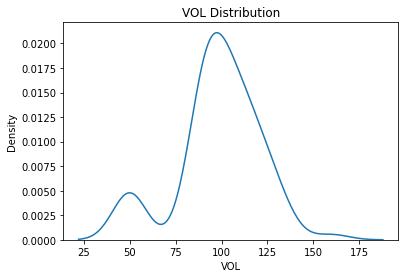

In [19]:
sns.kdeplot(data=cars_data,x='VOL')
plt.title('VOL Distribution')
plt.show()

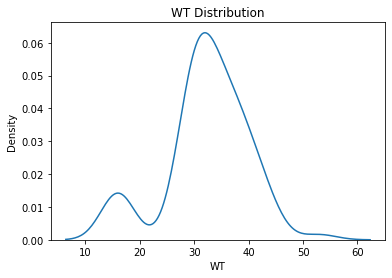

In [20]:
sns.kdeplot(data=cars_data,x='WT')
plt.title('WT Distribution')
plt.show()

### Probplot for Normality Test

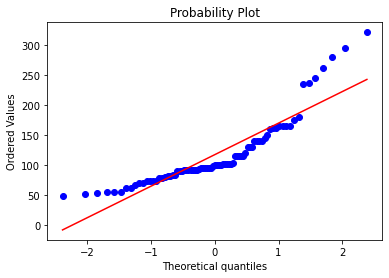

In [88]:
from scipy import stats
stats.probplot(x = cars_data['HP'],plot = plt)
plt.show()

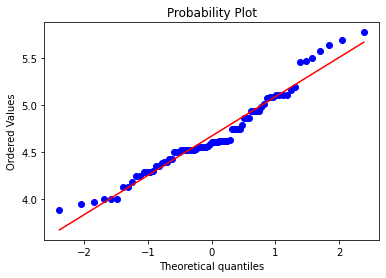

In [92]:
stats.probplot(x = cars_data_2['log_HP'],plot = plt)
plt.show()

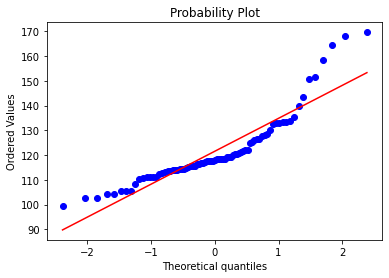

In [89]:
stats.probplot(x = cars_data['SP'],plot = plt)
plt.show()

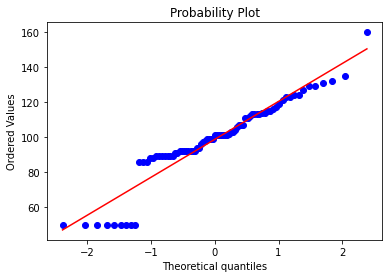

In [90]:
stats.probplot(x = cars_data['VOL'],plot = plt)
plt.show()

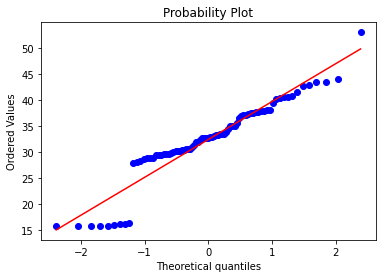

In [91]:
stats.probplot(x = cars_data['WT'],plot = plt)
plt.show()

### Normality Test is Failed.

## 3. No AutoRegression

No inputs are showing timedate format. So it passed.

## 4. No Multicollinearity

2 Techniques:
1. Correlation Matrix
2. VIF Factor

#### 4.1 Correlation Matrix 

In [23]:
corr_matrix = cars_data.corr().round(2)
corr_matrix

,HP,MPG,VOL,SP,WT
HP,1.00,-0.73,0.08,0.97,0.08
MPG,-0.73,1.00,-0.53,-0.69,-0.53
VOL,0.08,-0.53,1.00,0.10,1.00
SP,0.97,-0.69,0.10,1.00,0.10
WT,0.08,-0.53,1.00,0.10,1.00


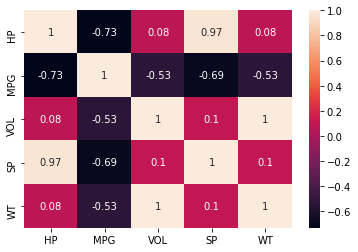

In [26]:
sns.heatmap(data = corr_matrix,annot=True)
plt.show()

## 5. Homoscedasticity Check || 6. Zero Residual Mean Check

This will be performed post Model Training because we need the **errors.**

## ========================================================================

# REFERENCE DATA TO UNDERSTAND HOW ASSUMPTIONS SHOULD MATCH WITH THE DATA:

In [27]:
import numpy as np

In [77]:
X = np.random.randn(81)
y = 10*X + np.random.randn(81)*2

In [78]:
demo_data = pd.DataFrame(data = [X,y]).T
demo_data.columns = ['X','y']
demo_data

,X,y
0,0.140794,0.155281
1,-0.236023,-2.425947
2,-0.797431,-8.544417
3,-0.140570,-0.841069
4,0.384604,1.364256
...,...,...
76,-0.234063,-1.127561
77,-0.566514,-4.770561
78,-0.003044,-1.172337
79,-0.444497,-1.865769


### 1. Linearity Test

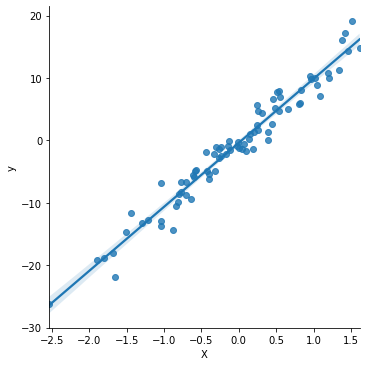

In [79]:
sns.lmplot(x='X', y='y', data=demo_data)

### Linearity Test is Passed.

### 2. Normality Test

<AxesSubplot:xlabel='X', ylabel='Density'>

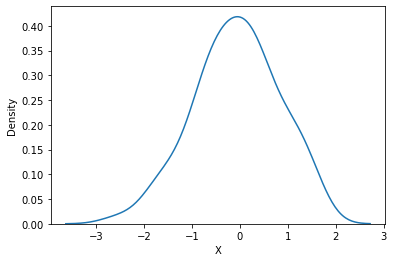

In [80]:
sns.kdeplot(x = 'X', data = demo_data)

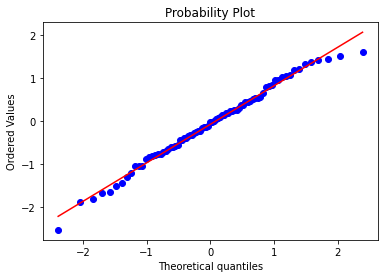

In [86]:
from scipy import stats
stats.probplot(x = demo_data['X'] ,dist = 'norm',plot=plt) #qqplot
plt.show()

In [47]:
demo_data['X'].skew()

-0.26327354125880476

In [48]:
demo_data['X'].kurt()

0.12504104083602696

### Normality Test is Passed.

# 4. Model Building

In [51]:
X = demo_data[['X']]
y = demo_data[['y']]

# 5. Model Training

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
linear_model = LinearRegression() #Object #Model Initialization

In [54]:
linear_model.fit(X,y)

LinearRegression()

In [55]:
linear_model.coef_

array([[9.98635534]])

In [56]:
linear_model.intercept_

array([0.30238158])

# 6. Model Testing

In [58]:
y

,y
0,-7.183552
1,7.925877
2,-1.807197
3,6.409147
4,2.276093
...,...
76,-1.550350
77,1.333167
78,23.107207
79,2.558277


In [59]:
y_pred = linear_model.predict(X)

## 7. Model Evaluation

In [61]:
error = y - y_pred
error

,y
0,-0.743591
1,2.815762
2,-0.681302
3,3.514755
4,0.611925
...,...
76,2.045809
77,1.300039
78,2.518826
79,1.544043


## .....back to Assumption Check

## Homoscedasticity Check

In [63]:
X

,X
0,-0.675155
1,0.481430
2,-0.143023
3,0.259555
4,0.136365
...,...
76,-0.390387
77,-0.026962
78,2.031372
79,0.071283


In [64]:
error

,y
0,-0.743591
1,2.815762
2,-0.681302
3,3.514755
4,0.611925
...,...
76,2.045809
77,1.300039
78,2.518826
79,1.544043


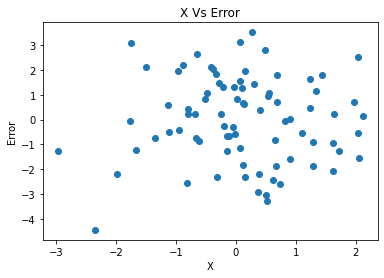

In [66]:
plt.scatter(x=demo_data['X'],y=error)
plt.title('X Vs Error')
plt.xlabel('X')
plt.ylabel('Error')
plt.show()

### Homoscedasticity Check is passed.

## Zero Residual Mean across the Fitted Line.

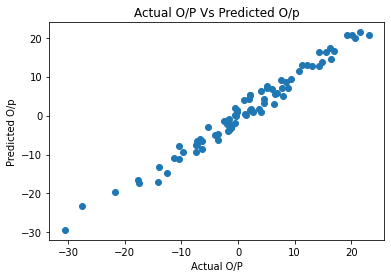

In [67]:
plt.scatter(x=demo_data['y'],y=y_pred)
plt.title('Actual O/P Vs Predicted O/p')
plt.xlabel('Actual O/P')
plt.ylabel('Predicted O/p')
plt.show()

## ========================================================================

# 4. Model Building

In [3]:
X = cars_data.drop('MPG',axis=1)
y = cars_data[['MPG']]

# 5. Model Training

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
linear_model = LinearRegression() #Object #Model Initialization

In [73]:
linear_model.fit(X,y)

LinearRegression()

In [74]:
linear_model.coef_

array([[-0.20544372, -0.33605084,  0.39562692,  0.40057409]])

In [75]:
linear_model.intercept_

array([30.67733585])

# 6. Model Testing

In [76]:
y

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


In [77]:
y_pred = linear_model.predict(X)
y_pred

array([[43.44193477],
       [42.38879289],
       [42.27934147],
       [42.53835981],
       [42.17264802],
       [43.02061916],
       [42.32536062],
       [48.07621852],
       [48.28120247],
       [40.79122814],
       [41.52153227],
       [47.80956747],
       [39.95980269],
       [41.52757889],
       [41.76632332],
       [41.6181448 ],
       [41.15094046],
       [47.98605515],
       [41.30861046],
       [37.87127922],
       [38.57706414],
       [37.35199705],
       [37.89770285],
       [39.5625144 ],
       [39.93380662],
       [46.73870908],
       [35.48165898],
       [38.78152504],
       [38.24861192],
       [36.00285298],
       [34.84603989],
       [37.21630246],
       [37.13919796],
       [34.82541399],
       [37.22361389],
       [37.53950097],
       [39.27144845],
       [38.24219888],
       [38.54286458],
       [35.9391722 ],
       [34.2129755 ],
       [35.36313259],
       [37.50473376],
       [38.07998482],
       [35.79651664],
       [36

## 7. Model Evaluation

In [78]:
error = y - y_pred
error

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


## .....back to Assumption Check

## Homoscedasticity Check

In [79]:
X

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [85]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_X = std_scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X,columns = ['HP','VOL','SP','WT'])
scaled_X

,HP,VOL,SP,WT
0,-1.206295,-0.440611,-1.231403,-0.490238
1,-1.100587,-0.305252,-1.140871,-0.261299
2,-1.100587,-0.305252,-1.140871,-0.297993
3,-0.836315,-0.305252,-0.573239,-0.239103
4,-1.135823,-0.305252,-1.211826,-0.338878
...,...,...,...,...
76,3.603442,-2.200268,3.409929,-2.186236
77,2.123523,0.732494,2.060245,0.740025
78,2.563975,-2.200268,2.132755,-2.235028
79,3.127754,0.912972,3.292567,0.941462


In [86]:
error

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


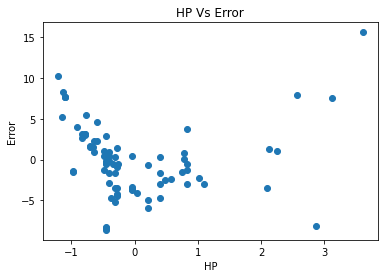

In [87]:
plt.scatter(x=scaled_X['HP'],y=error)
plt.title('HP Vs Error')
plt.xlabel('HP')
plt.ylabel('Error')
plt.show()

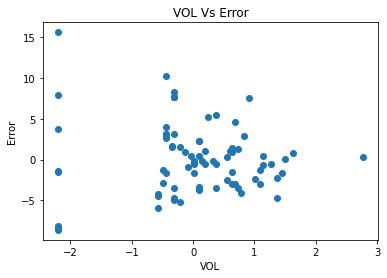

In [88]:
plt.scatter(x=scaled_X['VOL'],y=error)
plt.title('VOL Vs Error')
plt.xlabel('VOL')
plt.ylabel('Error')
plt.show()

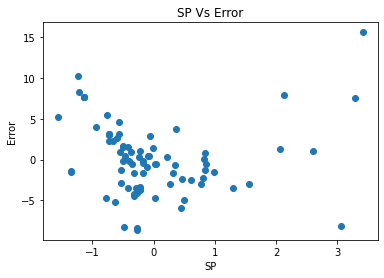

In [89]:
plt.scatter(x=scaled_X['SP'],y=error)
plt.title('SP Vs Error')
plt.xlabel('SP')
plt.ylabel('Error')
plt.show()

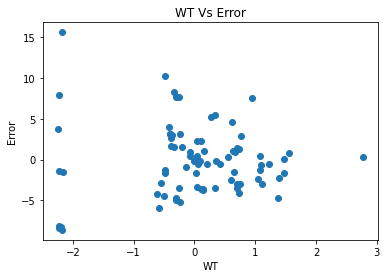

In [90]:
plt.scatter(x=scaled_X['WT'],y=error)
plt.title('WT Vs Error')
plt.xlabel('WT')
plt.ylabel('Error')
plt.show()

### Homoscedasticity Check is Failed.

## Zero Residual Mean across the Fitted Line.

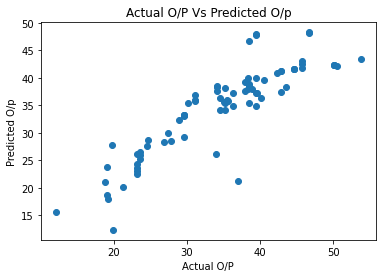

In [91]:
plt.scatter(x=y,y=y_pred)
plt.title('Actual O/P Vs Predicted O/p')
plt.xlabel('Actual O/P')
plt.ylabel('Predicted O/p')
plt.show()

### Zero Residual Mean Test is also Failed.

## =======================================================================

# Build Linear Regression using StatsModels

## 5. Model Building || 6. Model Training

In [5]:
import statsmodels.formula.api as smf

In [6]:
cars_data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [11]:
linear_model_stats = smf.ols('MPG~HP + VOL + SP + WT',data = cars_data).fit()

## Evaluation Metrics of Linear Regression

In [22]:
print('R2Score     :',linear_model_stats.rsquared.round(4)) #Overall Contribution of Predictors
print('Adj.R2Score :',linear_model_stats.rsquared_adj.round(4)) #Overall Contribution of Predictors
print('AIC Value   :',linear_model_stats.aic.round(4)) #Error Impurity
print('BIC Value   :',linear_model_stats.bic.round(4)) #Error Impurity

R2Score     : 0.7705
Adj.R2Score : 0.7585
AIC Value   : 477.9279
BIC Value   : 489.9002


In [34]:
linear_model_stats_1 = smf.ols('MPG~HP',data = cars_data).fit()
print('R2Score     :',linear_model_stats_1.rsquared.round(4)) #Overall Contribution of Predictors
print('Adj.R2Score :',linear_model_stats_1.rsquared_adj.round(4)) #Overall Contribution of Predictors
print('AIC Value   :',linear_model_stats_1.aic.round(4)) #Error Impurity
print('BIC Value   :',linear_model_stats_1.bic.round(4)) #Error Impurity
print('P-Value     :\n',linear_model_stats_1.pvalues)

R2Score     : 0.5257
Adj.R2Score : 0.5197
AIC Value   : 530.7453
BIC Value   : 535.5342
P-Value     :
 Intercept    1.211037e-44
HP           1.956490e-14
dtype: float64


### Hypothesis Formulation

**H0: Input feature/This is not significant for prediction.**

**Ha: It is a significant feature**

**Level of significance = 5%**

In [35]:
linear_model_stats_2 = smf.ols('MPG~HP + VOL',data = cars_data).fit()
print('R2Score     :',linear_model_stats_2.rsquared.round(4)) #Overall Contribution of Predictors
print('Adj.R2Score :',linear_model_stats_2.rsquared_adj.round(4)) #Overall Contribution of Predictors
print('AIC Value   :',linear_model_stats_2.aic.round(4)) #Error Impurity
print('BIC Value   :',linear_model_stats_2.bic.round(4)) #Error Impurity
print('P-Value     :\n',linear_model_stats_2.pvalues)

R2Score     : 0.7507
Adj.R2Score : 0.7443
AIC Value   : 480.6569
BIC Value   : 487.8403
P-Value     :
 Intercept    7.697003e-41
HP           1.203680e-19
VOL          1.654693e-12
dtype: float64


In [36]:
linear_model_stats_3 = smf.ols('MPG~HP + VOL + WT',data = cars_data).fit()
print('R2Score     :',linear_model_stats_3.rsquared.round(4)) #Overall Contribution of Predictors
print('Adj.R2Score :',linear_model_stats_3.rsquared_adj.round(4)) #Overall Contribution of Predictors
print('AIC Value   :',linear_model_stats_3.aic.round(4)) #Error Impurity
print('BIC Value   :',linear_model_stats_3.bic.round(4)) #Error Impurity
print('P-Value     :\n',linear_model_stats_3.pvalues)

R2Score     : 0.7517
Adj.R2Score : 0.742
AIC Value   : 482.3287
BIC Value   : 491.9065
P-Value     :
 Intercept    2.513123e-37
HP           1.981859e-19
VOL          3.746742e-01
WT           5.777112e-01
dtype: float64


In [37]:
linear_model_stats_4 = smf.ols('MPG~HP + VOL + SP',data = cars_data).fit()
print('R2Score     :',linear_model_stats_4.rsquared.round(4)) #Overall Contribution of Predictors
print('Adj.R2Score :',linear_model_stats_4.rsquared_adj.round(4)) #Overall Contribution of Predictors
print('AIC Value   :',linear_model_stats_4.aic.round(4)) #Error Impurity
print('BIC Value   :',linear_model_stats_4.bic.round(4)) #Error Impurity
print('P-Value     :\n',linear_model_stats_4.pvalues)

R2Score     : 0.7704
Adj.R2Score : 0.7614
AIC Value   : 475.9875
BIC Value   : 485.5653
P-Value     :
 Intercept    4.194554e-02
HP           8.644870e-07
VOL          1.648229e-13
SP           1.207855e-02
dtype: float64


In [38]:
linear_model_stats_5 = smf.ols('MPG~HP + VOL + WT + SP',data = cars_data).fit()
print('R2Score     :',linear_model_stats_5.rsquared.round(4)) #Overall Contribution of Predictors
print('Adj.R2Score :',linear_model_stats_5.rsquared_adj.round(4)) #Overall Contribution of Predictors
print('AIC Value   :',linear_model_stats_5.aic.round(4)) #Error Impurity
print('BIC Value   :',linear_model_stats_5.bic.round(4)) #Error Impurity
print('P-Value     :\n',linear_model_stats_5.pvalues)

R2Score     : 0.7705
Adj.R2Score : 0.7585
AIC Value   : 477.9279
BIC Value   : 489.9002
P-Value     :
 Intercept    0.042936
HP           0.000001
VOL          0.556294
WT           0.813649
SP           0.014579
dtype: float64


In [39]:
linear_model_stats_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     87.55
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           1.96e-14
Time:                        12:28:46   Log-Likelihood:                -263.37
No. Observations:                  81   AIC:                             530.7
Df Residuals:                      79   BIC:                             535.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.0392      1.616     29.722      0.000      44.822      51.256
HP            -0.1159      0.012     -9.357      0.000      -0.141      -0.091
==============================================================================
Omnibus:                       20.653   Durbin-Watson:                   1.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.053
Skew:                           0.949   Prob(JB):                     9.00e-09
Kurtosis:                       5.716   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ========================================================================

## 5. Build Linear Regression using sklearn library

In [44]:
X = cars_data.drop('MPG',axis = 1)
y = cars_data[['MPG']]

In [45]:
X.shape,y.shape

((81, 4), (81, 1))

## 6. Model Training

In [46]:
from sklearn.linear_model import LinearRegression
linear_model_sklearn = LinearRegression()
linear_model_sklearn.fit(X,y)

LinearRegression()

## 7. Model Testing

In [47]:
y_pred = linear_model_sklearn.predict(X)

## 8. Model Evaluation

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [49]:
mean_squared_error(y,y_pred)

18.89714115234311

In [51]:
mean_absolute_error(y,y_pred)

3.267968285420799

# MODEL OPTIMIZATION TECHNIQUES

## TAKEAWAY:

Here wrt to few datapoints, it is evident that most of the input features are not showing direct linear relationship with output varible. So we have to do some transformations to make to linear.

#### Data transformation techniques if the data is CONTINUOUS:

* Log Transformation
* Square Root Transformation
* Cube Root Transformation
* Reciprocal Transformation
* Boxcox Transformation
* Standard Scaler
* Min Max Scaler
* Robust Scaler

### Data transformation techniques if the data is DISCRETE:

* Label Encoding
* One Hot Encoding

In [54]:
import numpy as np

In [57]:
cars_data_2 = cars_data.copy()
cars_data_2.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [60]:
cars_data_2['log_HP'] = np.log(cars_data_2['HP'])
cars_data_2['log_VOL'] = np.log(cars_data_2['VOL'])
cars_data_2['log_SP'] = np.log(cars_data_2['SP'])
cars_data_2['log_WT'] = np.log(cars_data_2['WT'])
cars_data_2

,HP,MPG,VOL,SP,WT,log_HP,log_VOL,log_SP,log_WT
0,49,53.700681,89,104.185353,28.762059,3.891820,4.488636,4.646172,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,4.521789,4.658344,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,4.521789,4.658344,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,4.521789,4.648816,3.397495
...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,3.912023,5.133434,2.780864
77,238,19.197888,115,150.576579,37.923113,5.472271,4.744932,5.014472,3.635561
78,263,34.000000,50,151.598513,15.769625,5.572154,3.912023,5.021236,2.758086
79,295,19.833733,119,167.944460,39.423099,5.686975,4.779123,5.123633,3.674352


## 3.2 ASSUMPTIONS CHECK

## 1. Linearity Test

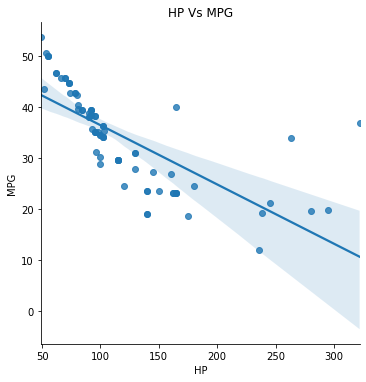

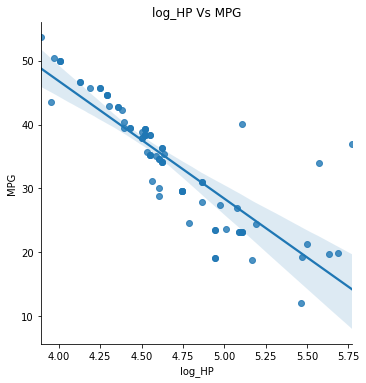

In [61]:
sns.lmplot(x='HP',y='MPG',data=cars_data_2)
plt.title('HP Vs MPG')

sns.lmplot(x='log_HP',y='MPG',data=cars_data_2)
plt.title('log_HP Vs MPG')
plt.show()

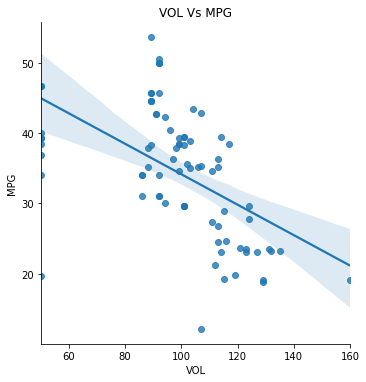

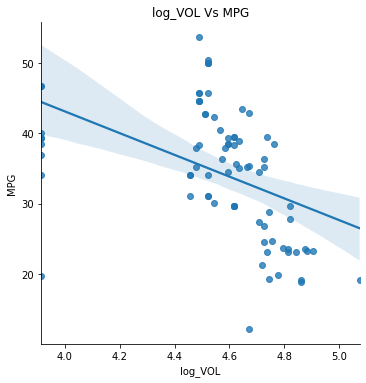

In [62]:
sns.lmplot(x='VOL',y='MPG',data=cars_data_2)
plt.title('VOL Vs MPG')

sns.lmplot(x='log_VOL',y='MPG',data=cars_data_2)
plt.title('log_VOL Vs MPG')
plt.show()

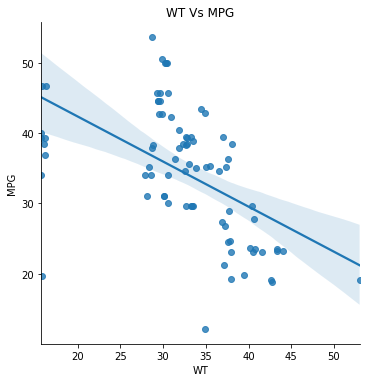

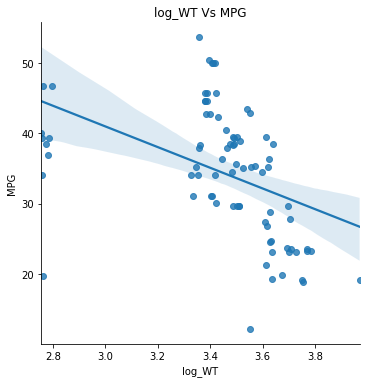

In [63]:
sns.lmplot(x='WT',y='MPG',data=cars_data_2)
plt.title('WT Vs MPG')

sns.lmplot(x='log_WT',y='MPG',data=cars_data_2)
plt.title('log_WT Vs MPG')
plt.show()

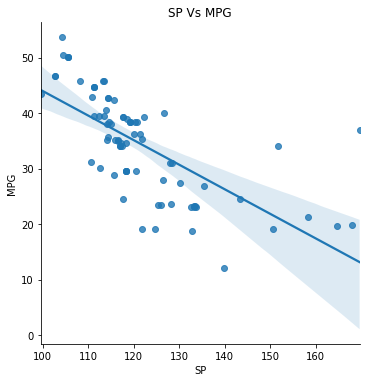

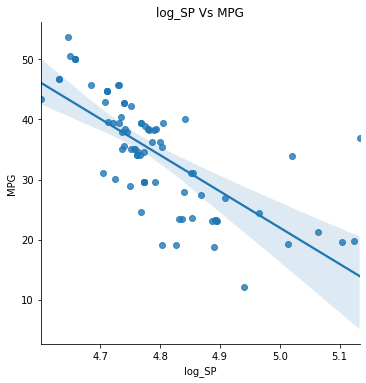

In [64]:
sns.lmplot(x='SP',y='MPG',data=cars_data_2)
plt.title('SP Vs MPG')

sns.lmplot(x='log_SP',y='MPG',data=cars_data_2)
plt.title('log_SP Vs MPG')
plt.show()

### Linearity Test is Failed.

## 3.2 Normality Test

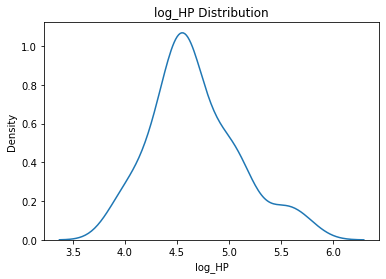

In [66]:
sns.kdeplot(data=cars_data_2,x='log_HP')
plt.title('log_HP Distribution')
plt.show()

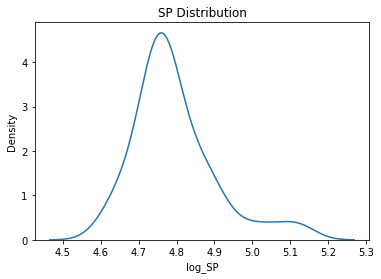

In [67]:
sns.kdeplot(data=cars_data_2,x='log_SP')
plt.title('SP Distribution')
plt.show()

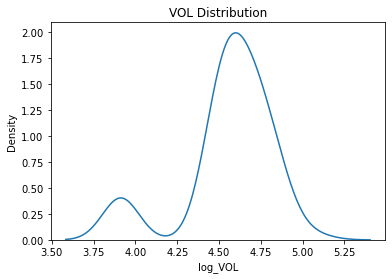

In [68]:
sns.kdeplot(data=cars_data_2,x='log_VOL')
plt.title('VOL Distribution')
plt.show()

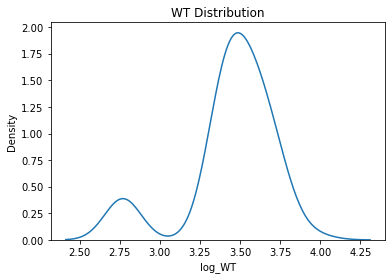

In [69]:
sns.kdeplot(data=cars_data_2,x='log_WT')
plt.title('WT Distribution')
plt.show()

### Normality Test is Failed.

## Model Building || Training || Evaluation using Statsmodels

In [70]:
linear_model_stats_1 = smf.ols('MPG~log_HP',data = cars_data_2).fit()
print('R2Score     :',linear_model_stats_1.rsquared.round(4)) #Overall Contribution of Predictors
print('Adj.R2Score :',linear_model_stats_1.rsquared_adj.round(4)) #Overall Contribution of Predictors
print('AIC Value   :',linear_model_stats_1.aic.round(4)) #Error Impurity
print('BIC Value   :',linear_model_stats_1.bic.round(4)) #Error Impurity
print('P-Value     :\n',linear_model_stats_1.pvalues)

R2Score     : 0.7114
Adj.R2Score : 0.7078
AIC Value   : 490.4986
BIC Value   : 495.2875
P-Value     :
 Intercept    7.082927e-32
log_HP       5.066177e-23
dtype: float64


### Hypothesis Formulation

**H0: Input feature/This is not significant for prediction.**

**Ha: It is a significant feature**

**Level of significance = 5%**

In [71]:
linear_model_stats_2 = smf.ols('MPG~log_HP + log_VOL',data = cars_data_2).fit()
print('R2Score     :',linear_model_stats_2.rsquared.round(4)) #Overall Contribution of Predictors
print('Adj.R2Score :',linear_model_stats_2.rsquared_adj.round(4)) #Overall Contribution of Predictors
print('AIC Value   :',linear_model_stats_2.aic.round(4)) #Error Impurity
print('BIC Value   :',linear_model_stats_2.bic.round(4)) #Error Impurity
print('P-Value     :\n',linear_model_stats_2.pvalues)

R2Score     : 0.8414
Adj.R2Score : 0.8373
AIC Value   : 444.0331
BIC Value   : 451.2165
P-Value     :
 Intercept    2.046654e-34
log_HP       3.965778e-29
log_VOL      9.705055e-12
dtype: float64


In [72]:
linear_model_stats_3 = smf.ols('MPG~log_HP + log_VOL + log_WT',data = cars_data_2).fit()
print('R2Score     :',linear_model_stats_3.rsquared.round(4)) #Overall Contribution of Predictors
print('Adj.R2Score :',linear_model_stats_3.rsquared_adj.round(4)) #Overall Contribution of Predictors
print('AIC Value   :',linear_model_stats_3.aic.round(4)) #Error Impurity
print('BIC Value   :',linear_model_stats_3.bic.round(4)) #Error Impurity
print('P-Value     :\n',linear_model_stats_3.pvalues)

R2Score     : 0.8421
Adj.R2Score : 0.8359
AIC Value   : 445.6706
BIC Value   : 455.2484
P-Value     :
 Intercept    2.136385e-04
log_HP       3.365777e-28
log_VOL      3.819720e-01
log_WT       5.584725e-01
dtype: float64


In [73]:
linear_model_stats_4 = smf.ols('MPG~log_HP + log_VOL + log_SP',data = cars_data_2).fit()
print('R2Score     :',linear_model_stats_4.rsquared.round(4)) #Overall Contribution of Predictors
print('Adj.R2Score :',linear_model_stats_4.rsquared_adj.round(4)) #Overall Contribution of Predictors
print('AIC Value   :',linear_model_stats_4.aic.round(4)) #Error Impurity
print('BIC Value   :',linear_model_stats_4.bic.round(4)) #Error Impurity
print('P-Value     :\n',linear_model_stats_4.pvalues)

R2Score     : 0.9111
Adj.R2Score : 0.9077
AIC Value   : 399.1035
BIC Value   : 408.6813
P-Value     :
 Intercept    2.979573e-03
log_HP       4.084975e-23
log_VOL      1.603615e-14
log_SP       2.763985e-11
dtype: float64


In [74]:
linear_model_stats_5 = smf.ols('MPG~log_HP + log_VOL + log_WT + log_SP',data = cars_data_2).fit()
print('R2Score     :',linear_model_stats_5.rsquared.round(4)) #Overall Contribution of Predictors
print('Adj.R2Score :',linear_model_stats_5.rsquared_adj.round(4)) #Overall Contribution of Predictors
print('AIC Value   :',linear_model_stats_5.aic.round(4)) #Error Impurity
print('BIC Value   :',linear_model_stats_5.bic.round(4)) #Error Impurity
print('P-Value     :\n',linear_model_stats_5.pvalues)

R2Score     : 0.9118
Adj.R2Score : 0.9071
AIC Value   : 400.5013
BIC Value   : 412.4736
P-Value     :
 Intercept    1.461211e-02
log_HP       1.563309e-22
log_VOL      6.825708e-01
log_WT       4.537425e-01
log_SP       3.314965e-11
dtype: float64


## =======================================================================